# SHAP values for categorical features
<br>
<b>Dataset:</b> https://www.kaggle.com/datasets/uciml/mushroom-classification

In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

import xgboost as xgb

import shap
shap.initjs()

path = "/Users/conorosully/Google Drive/My Drive/Medium/SHAP categorical/{}"

In [7]:
#load data 
data = pd.read_csv("../../../data/mushrooms.csv")

#get features
y = data['class']
y = y.astype('category').cat.codes
X_cat = data.drop('class', axis=1)


print(len(data))
data.head()

8124


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
#fit encoder
enc = OneHotEncoder()
enc.fit(X_cat)

#transform categorical features
X_encoded = enc.transform(X_cat).toarray()

#create feature matrix
feature_names = X_cat.columns
new_feature_names = enc.get_feature_names(feature_names)

X = pd.DataFrame(X_encoded, columns= new_feature_names)

X

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
#Train model
model = xgb.XGBClassifier(objective="binary:logistic", 
                         max_depth=2, 
                        n_estimators=10)
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

[[4112   96]
 [  88 3828]]


0.9773510585918267

# Standard SHAP values

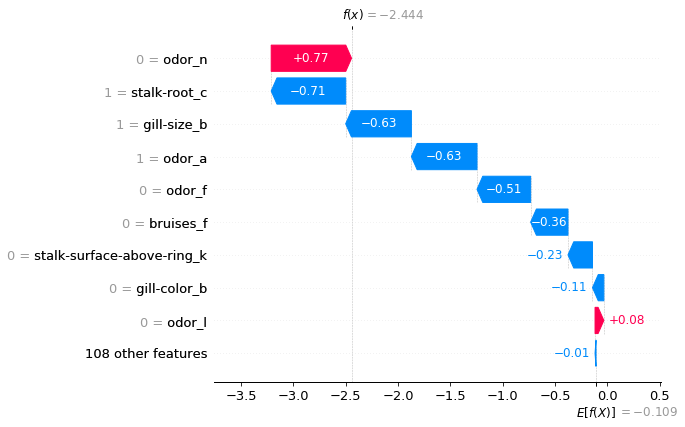

In [25]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# waterfall plot
shap.plots.waterfall(shap_values[1], show=False)

plt.savefig(path.format('standard_shap.png'),dpi=100,bbox_inches='tight')

# SHAP for catgeorical features 

In [16]:
print(shap_values)

.values =
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

.base_values =
array([-0.10899933, -0.10899933, -0.10899933, ..., -0.10899933,
       -0.10899933, -0.10899933], dtype=float32)

.data =
array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])


In [18]:
print(shap_values.values[1])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.35661033  0.         -0.6266489   0.
 -0.51225036  0.08398499  0.          0.7672449   0.          0.
  0.          0.          0.          0.00772181  0.         -0.62764466
  0.         -0.10836244  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.7112466
  0.          0.          0.         -0.2341366   0.          0.
  0.          0.          0.         -0.00338919  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.      

In [19]:
#get number of unique categories for each feature 
n_categories = []
for feat in feature_names[:-1]:
    n = X_cat[feat].nunique()
    n_categories.append(n)
    
n_categories

[6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 5, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6]

In [20]:
new_shap_values = []
for values in shap_values.values:
    
    #split shap values into a list for each feature
    values_split = np.split(values , np.cumsum(n_categories))
    
    #sum values within each list
    values_sum = [sum(l) for l in values_split]
    
    new_shap_values.append(values_sum)


print(len(new_shap_values),sum(new_shap_values[1]),sum(shap_values.values[1]))
print(new_shap_values[1])

8124 -2.334925272036344 -2.334925272036344
[0.0, 0.0, 0.0, -0.35661032795906067, -0.2876694053411484, 0.0, 0.007721807342022657, -0.6276446580886841, -0.10836244374513626, 0.0, -0.7112466096878052, -0.23413659632205963, -0.003389185294508934, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.01358785293996334, 0.0, 0.0]


In [27]:
#replace shap values
shap_values.values = np.array(new_shap_values)

#replace data with categorical feature values 
new_data = np.array(X_cat)
shap_values.data = np.array(new_data)

#update feature names
shap_values.feature_names = list(X_cat.columns)

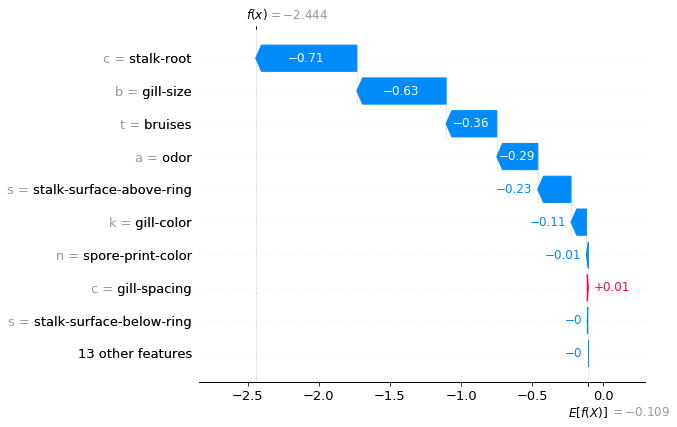

In [28]:
# waterfall plot
shap.plots.waterfall(shap_values[1], show=False)

plt.savefig(path.format('category_shap.png'),dpi=100,bbox_inches='tight')

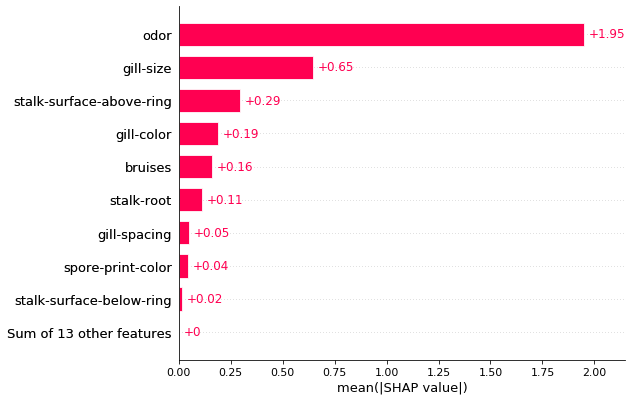

In [33]:
#Mean SHAP
shap.plots.bar(shap_values,show=False)

plt.savefig(path.format('mean_shap.png'),dpi=100,bbox_inches='tight')

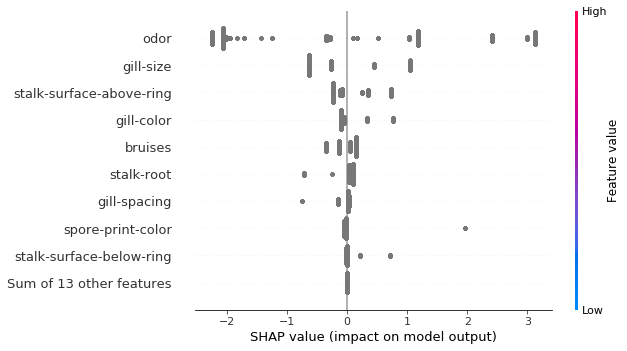

In [32]:
shap.plots.beeswarm(shap_values ,show=False)

plt.savefig(path.format('beeswarm.png'),dpi=100,bbox_inches='tight')

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


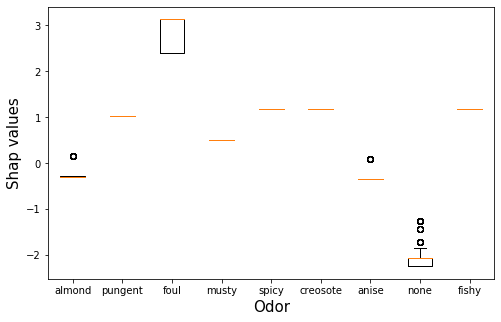

In [36]:
#get shaply values and data
odor_values = shap_values[:,"odor"].values
odor_data = shap_values[:,"odor"].data


#split odor shap values based on odor category
odor_categories = list(set(odor_data))

odor_groups = []
for o in odor_categories:
    relevant_values = odor_values[odor_data == o]
    odor_groups.append(relevant_values)
    
#replace categories with labels
odor_labels = {'a':'almond',
               'l':'anise', 
               'c':'creosote', 
               'y':'fishy', 
               'f':'foul', 
               'm':'musty', 
               'n':'none', 
               'p':'pungent', 
               's':'spicy'}

labels = [odor_labels[u] for u in unique_odor]

#plot boxplot
plt.figure(figsize=(8, 5))

plt.boxplot(odor_groups,labels=labels)

plt.ylabel('Shap values',size=15)
plt.xlabel('Odor',size=15)

plt.savefig(path.format('boxplot.png'),dpi=100,bbox_inches='tight')